In [2]:
sys.path.insert(0, '..')
import pyathena as pa

##### Read cooling/heating coefficients from table (see Kim & Ostriker 2017)

- Volumetric cooling/heating rates are: $n_{\rm H}^2\Lambda(T)$ and $n_{\rm H}\Gamma$. $\Gamma$ is proportional to the heat_ratio (unity for the solar neighborhood condition)


- Pressure, mean molecular weight, temperature, electron abundance, etc.

\begin{equation}
P = \dfrac{\rho k_{\rm B}T}{\mu m_{\rm H}} = \dfrac{\rho k_{\rm B}T_{\mu}}{m_{\rm H}}= \dfrac{n_{\rm H}k_{\rm B}T}{\mu_{\rm H}m_{\rm H}} \approx (n_{\rm H^0} + n_{\rm H^+} + n_{\rm H_2} + n_{\rm He} + n_{\rm e}) k_{\rm B}T \approx (1.1 + x_{\rm e} - x_{\rm H_2})n_{\rm H}k_{\rm B}T
\end{equation}

where $T_{\mu} \equiv T/\mu$, $x_{\rm e} = n_{\rm e}/n_{\rm H}$, and $x_{\rm H_2} = n_{\rm H_2}/n_{\rm H}$, and so on.

- The quantity $T_{1} \propto P/n_{\rm H}$ is easy to evolve in the cooling module.

- In the old cooling function,

    - $x_{\rm H_2} = 0$.
    - $T$, $\Lambda(T)$, $\Gamma(T)$ are tabulated as functions of $T_1$


In [45]:
cf = pa.classic.coolftn
c = cf.get_cool(cf.T1)
h = cf.get_heat(cf.T1)
T = cf.get_temp(cf.T1)

Text(692.6985294117648, 0.5, '$\\mu = T/T_{\\mu}$')

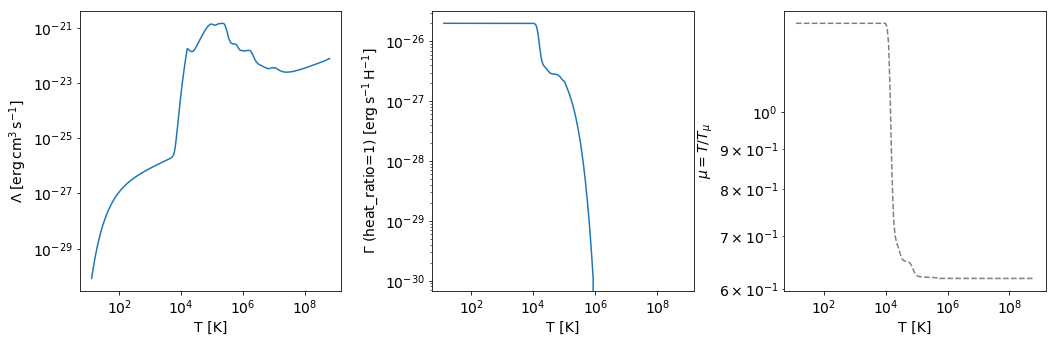

In [46]:
mpl.rcParams['font.size'] = 14
fig, axes = plt.subplots(1, 3, figsize=(15,5))
plt.sca(axes[0])
plt.loglog(T, c)
plt.xlabel('T [K]')
plt.ylabel(r'$\Lambda\;[{\rm erg}\,{\rm cm}^{3}\,{\rm s}^{-1}]$')

plt.sca(axes[1])
plt.loglog(T, h)
plt.xlabel('T [K]')
plt.ylabel(r'$\Gamma$ (heat_ratio=1) $[{\rm erg}\,{\rm s}^{-1}\,{\rm H}^{-1}]$')
plt.tight_layout()

plt.sca(axes[2])
plt.loglog(T, T/cf.T1, 'grey', ls='--')
plt.xlabel('T [K]')
plt.ylabel(r'$\mu = T/T_{\mu}$')

1.4271


Text(0, 0.5, '$P/k_{\\rm B}\\;[{\\rm K}\\cdot{\\rm cm}^{-3}]$')

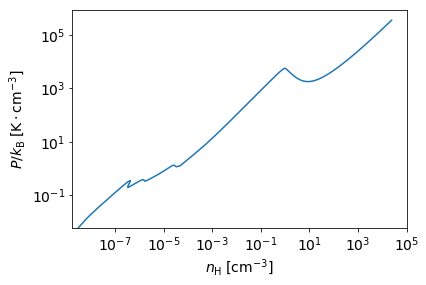

In [48]:
u = pa.Units()
print(u.muH)
nH_eq = h/c
# 1.1 + xe = u.muH/(temp/cf.T1)
pok_eq = nH_eq*u.muH*cf.T1
plt.loglog(nH_eq,pok_eq)
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'$P/k_{\rm B}\;[{\rm K}\cdot{\rm cm}^{-3}]$')
# plt.xlim(1e-3,1e5)
# plt.ylim(1e1,1e6)